# Car Details Dataset

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Practice dataset 2 CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Exploratory Data Analysis

In [3]:
data.shape

(4340, 8)

In [4]:
data.transmission.value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

<Axes: >

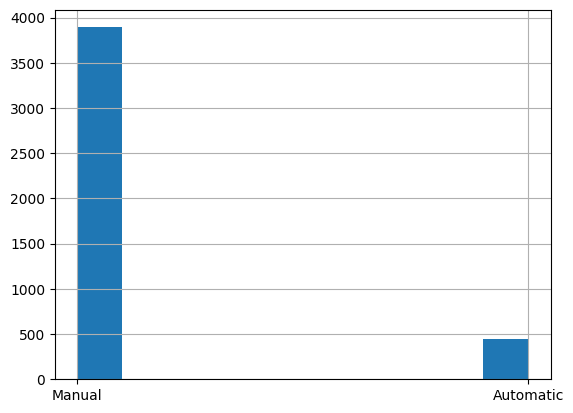

In [5]:
data.transmission.hist()

In [6]:
data.name.value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [7]:
data.fuel.value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

<Axes: >

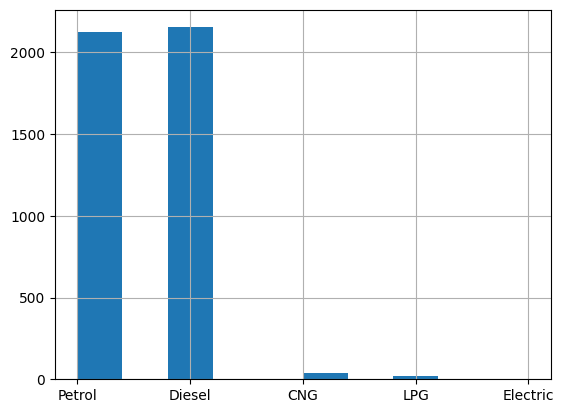

In [8]:
data.fuel.hist()

In [9]:
data.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

<Axes: >

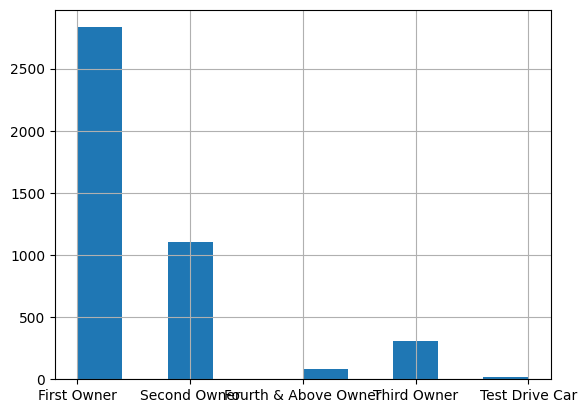

In [10]:
data.owner.hist()

In [11]:
data.seller_type.value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

<Axes: >

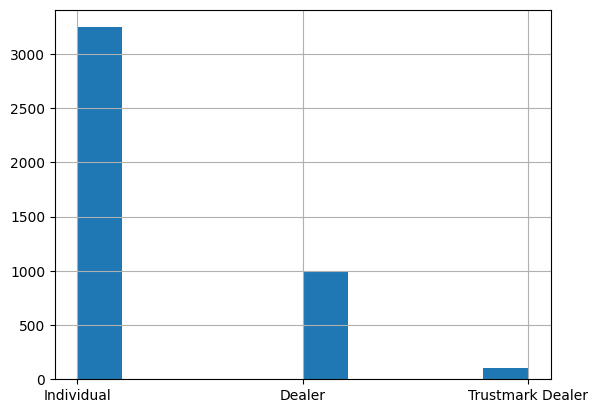

In [12]:
data.seller_type.hist()

In [13]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [14]:
data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


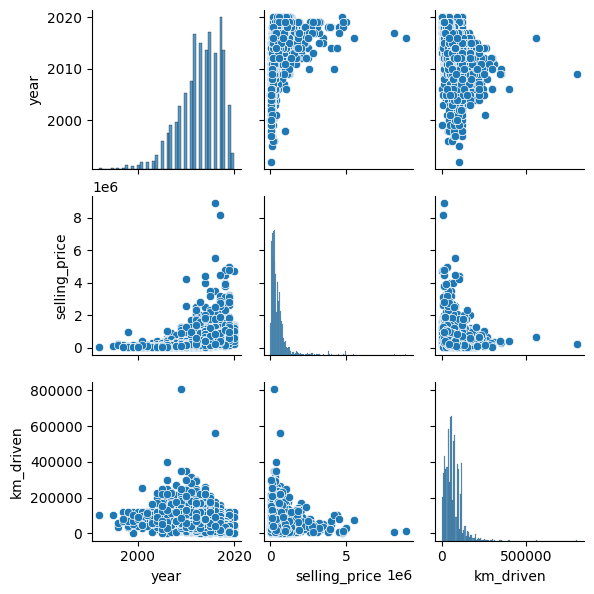

In [15]:
sns.pairplot(data=data, height=2)

In [16]:
# Creating dummies
data['transmission'] = data['transmission'].map({'Manual':0, 'Automatic':1})
data['fuel'] = data['fuel'].map({'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4})
data['seller_type'] = data['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})
data['owner'] = data['owner'].map({'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4})

## Variance Inflation Factor

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Independent variable set
X = data[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]

# VIF Dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

        feature       VIF
0          year  6.036745
1     km_driven  3.612187
2          fuel  2.072341
3   seller_type  1.445740
4  transmission  1.176808
5         owner  1.565716


In [18]:
data['log_km_driven'] = np.log1p(data['km_driven'])
data['log_selling_price'] = np.log1p(data['selling_price'])


## Setting Variables

In [19]:
X = data[['log_km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
Y = data['log_selling_price']

In [20]:
X.shape

(4340, 5)

In [21]:
Y.shape

(4340,)

## Splitting into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=64)

## Implementing the model

In [23]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

## Implementing the model

In [24]:
# Slope And Intercept

print("Estmated model slope:", mlr.coef_)
print("Estmated model intercept:", mlr.intercept_)
list(zip(X, mlr.coef_))

Estmated model slope: [-0.25608513 -0.62522586  0.19858053  0.89994998 -0.24371612]
Estmated model intercept: 15.836114697877306


[('log_km_driven', -0.25608512704415315),
 ('fuel', -0.6252258572463668),
 ('seller_type', 0.19858052862082337),
 ('transmission', 0.8999499779473247),
 ('owner', -0.24371611901318033)]

## Model Prediction

In [25]:
Y_pred = mlr.predict(X_test)


In [26]:
mlr_diff = pd.DataFrame({'Actual value':Y_test,'Predicted value': Y_pred})
mlr_diff.head()

,Actual value,Predicted value
1984,12.072547,12.223364
350,12.721889,13.143547
4250,12.765691,13.073909
2127,12.072547,12.457534
1446,11.289794,12.110219


## Model Evaluation

In [27]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(Y_test, Y_pred)
meanSqErr = metrics.mean_squared_error(Y_test, Y_pred)
rootMeanSqErr = metrics.root_mean_squared_error(Y_test, Y_pred)
print('R squared: {:.2f}'.format(mlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Squared Error:', meanSqErr)
print('Root Mean Squared Error:', rootMeanSqErr)


R squared: 47.24
Mean Absolute Error: 0.48693898950520614
Mean Squared Error: 0.37739286306811126
Root Mean Squared Error: 0.6143230933866244


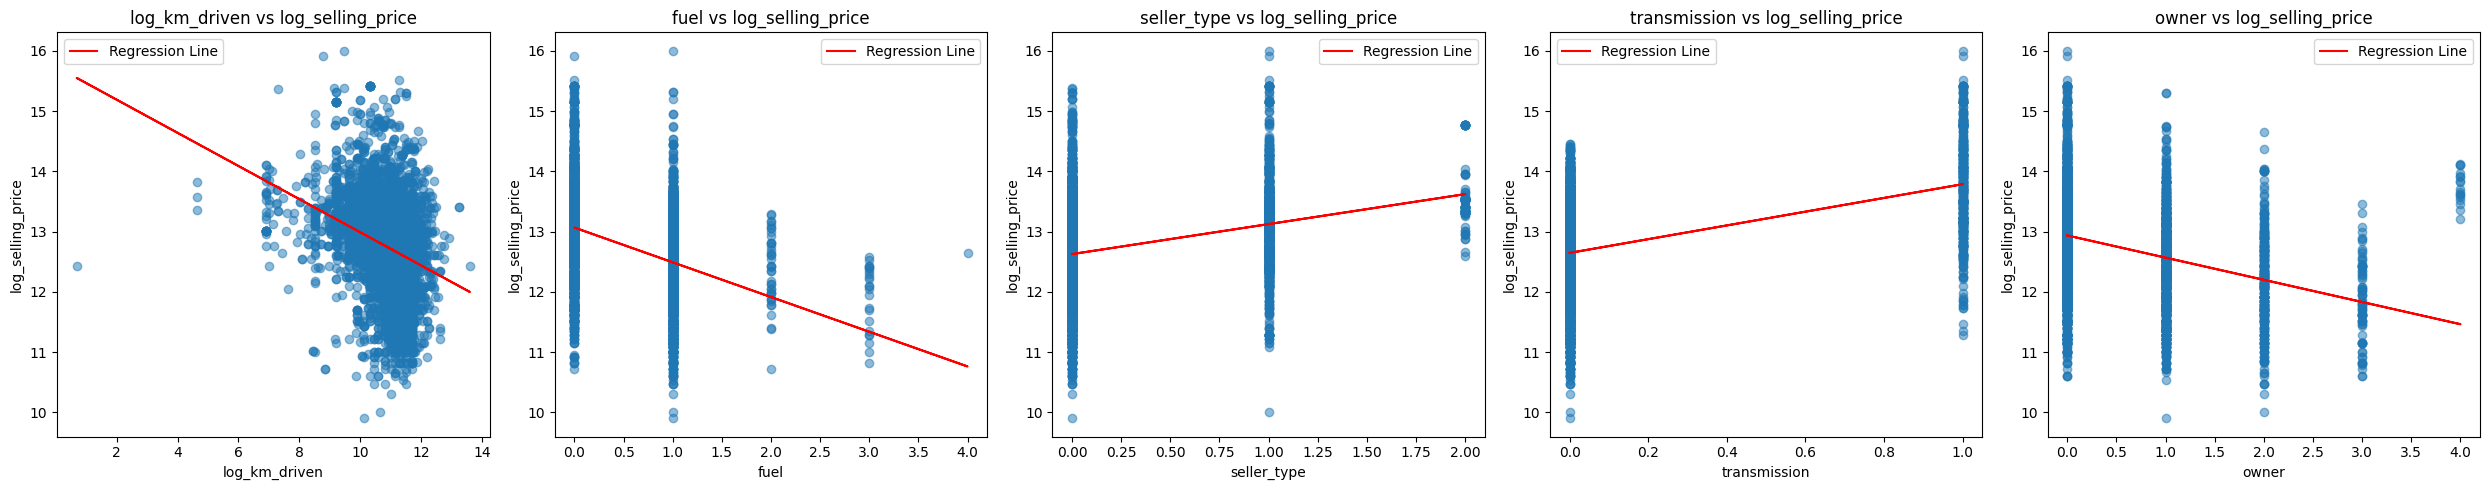

In [28]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

def plot_scatter_with_regression(ax, x_data, y_data, x_label, title):
    ax.scatter(x_data, y_data, alpha=0.5)
    
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regression_line = slope * x_data + intercept
    
    ax.plot(x_data, regression_line, color='red', label='Regression Line')
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('log_selling_price')
    ax.legend()
    
plot_scatter_with_regression(axes[0], data['log_km_driven'], data['log_selling_price'], 'log_km_driven', 'log_km_driven vs log_selling_price')

plot_scatter_with_regression(axes[1], data['fuel'], data['log_selling_price'], 'fuel', 'fuel vs log_selling_price')

plot_scatter_with_regression(axes[2], data['seller_type'], data['log_selling_price'], 'seller_type', 'seller_type vs log_selling_price')

plot_scatter_with_regression(axes[3], data['transmission'], data['log_selling_price'], 'transmission', 'transmission vs log_selling_price')

plot_scatter_with_regression(axes[4], data['owner'], data['log_selling_price'], 'owner', 'owner vs log_selling_price')


plt.tight_layout()
plt.show()